Perform Data Quality Checks and various Profiling Functions over the UCI Adult Dataset.

Link for the Dataset:

http://archive.ics.uci.edu/dataset/2/adult


## The Code

### Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset into a DataFrame

In [2]:
# Load the dataset into a DataFrame
def load_dataset():
    # TODO: Load the dataset from using ucimlrepo module as provided in the dataset link
    # Define the dataset as a Pandas DataFrame
    # fetch dataset
    adult = fetch_ucirepo(id=2)

    # data (as pandas dataframes)
    X = adult.data.features
    y = adult.data.targets

    df = pd.concat([X, y], axis=1)

    return df

### Function for applying DQM Checks

In [61]:
def data_quality_checks(df):
  # Handling missing values
  print("Missing values:\n", df.isnull().sum())

  # Check for duplicates
  print("Duplicate rows:\n", df.duplicated().sum())

  # Check for unique values in categorical columns
  print("Unique values in categorical columns:")
  for col in df.select_dtypes(include=['object']):
      print(col, df[col].nunique())

  # Check for outliers using z-score
  z_scores = np.abs(stats.zscore(df.select_dtypes(exclude=['object'])))
  print("Outliers:\n", (z_scores > 3).any(axis=1).sum())

### Applying profiling

In [62]:
def profiling_visualization(df):
  # Display basic information about the dataset
  print("Basic information:\n")
  df.info()

  # Descriptive statistics
  print("Descriptive statistics:\n", df.describe())

  # Categorical feature profiling
  print("Categorical feature profiling:")
  for col in df.select_dtypes(include=['object']):
      df[col].value_counts().plot(kind='bar')
      plt.show()

  # Numerical feature profiling
  print("Numerical feature profiling:")
  for col in df.select_dtypes(include=[np.number]):
      sns.boxplot(df[col])
      plt.show()

### Main function to display recommendation

Data Quality Checks:
Missing values:
 age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64
Duplicate rows:
 29
Unique values in categorical columns:
workclass 9
education 16
marital-status 7
occupation 15
relationship 6
race 5
sex 2
native-country 42
income 4
Outliers:
 4125

Profiling Visualization:
Basic information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-

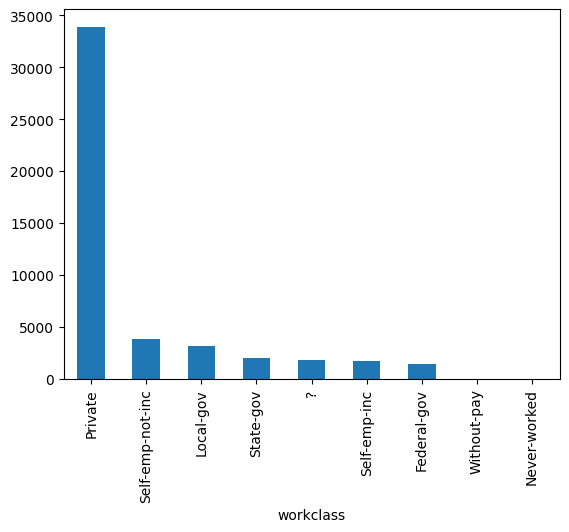

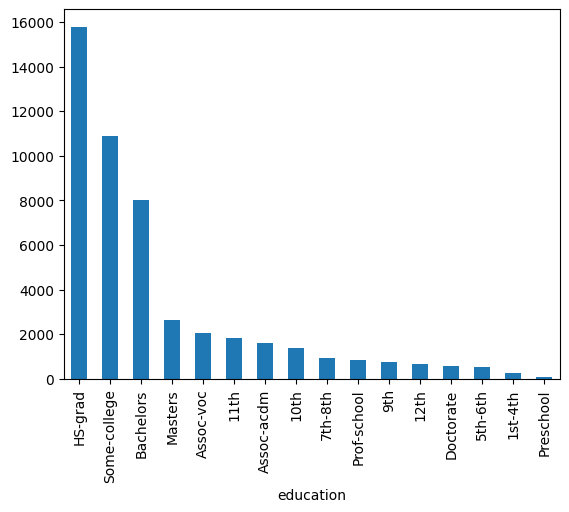

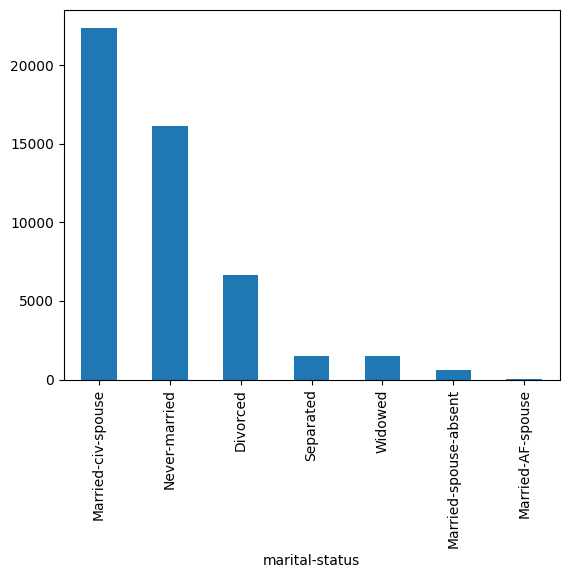

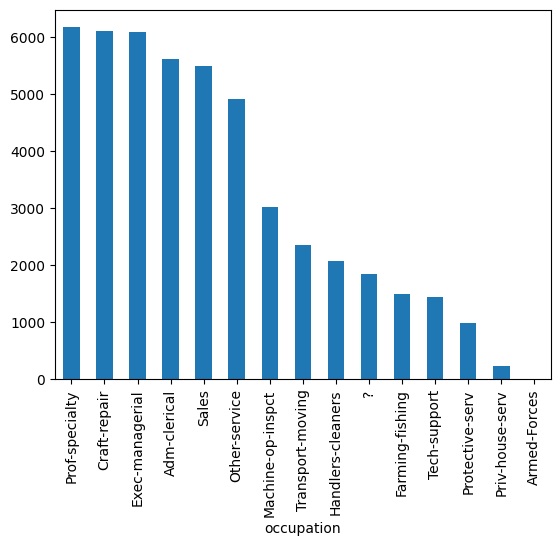

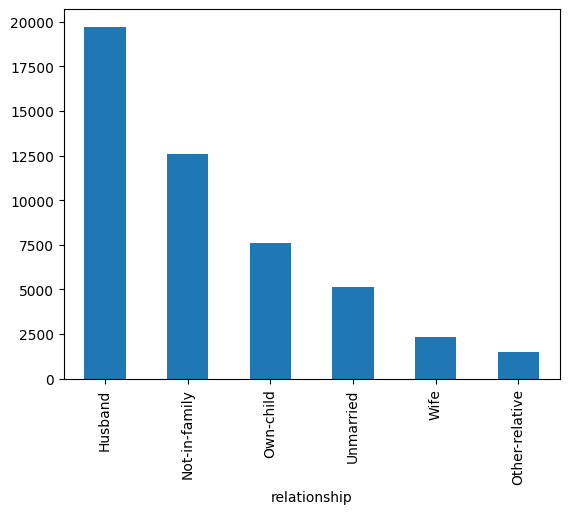

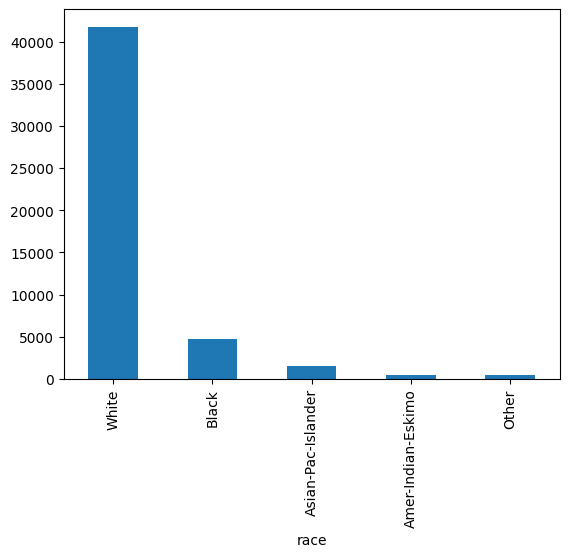

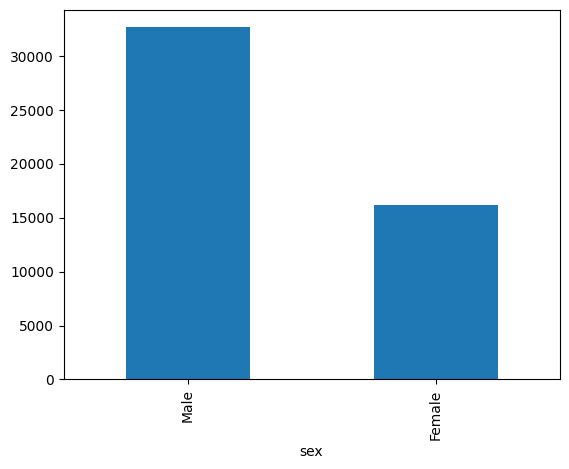

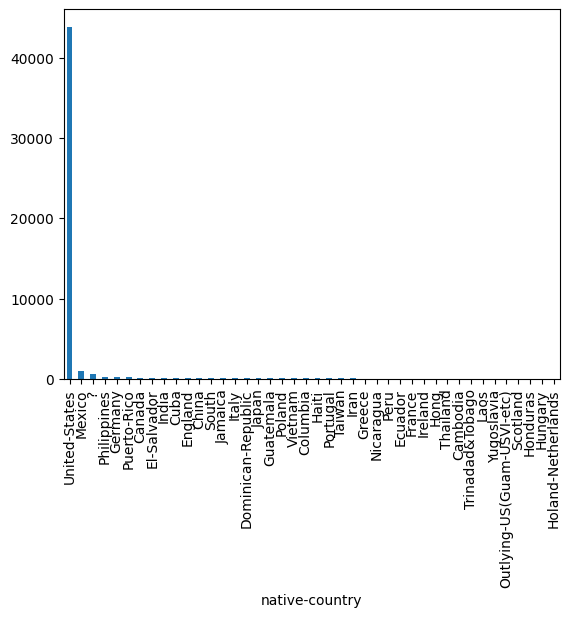

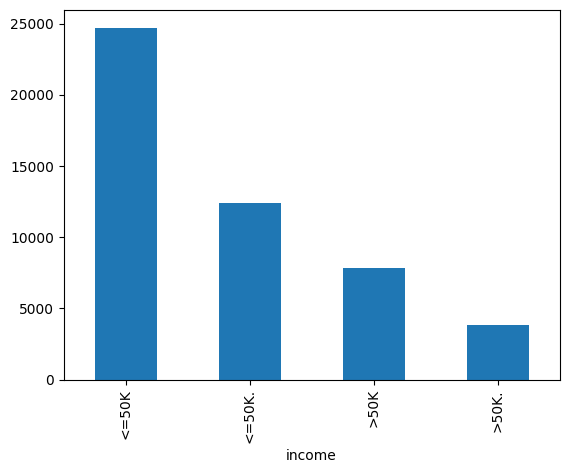

Numerical feature profiling:


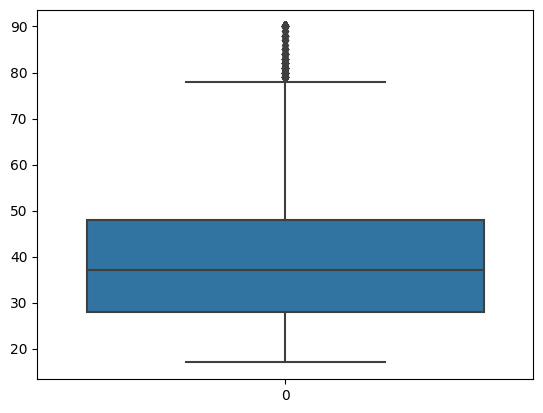

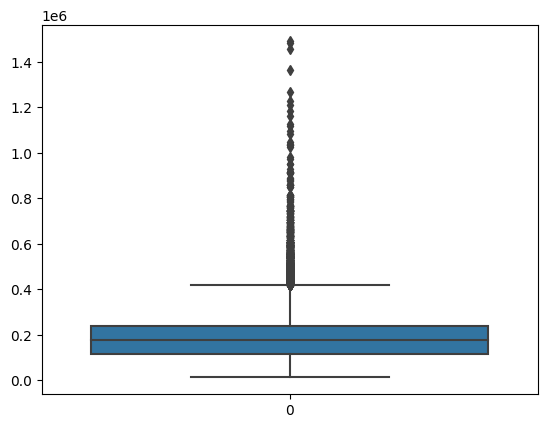

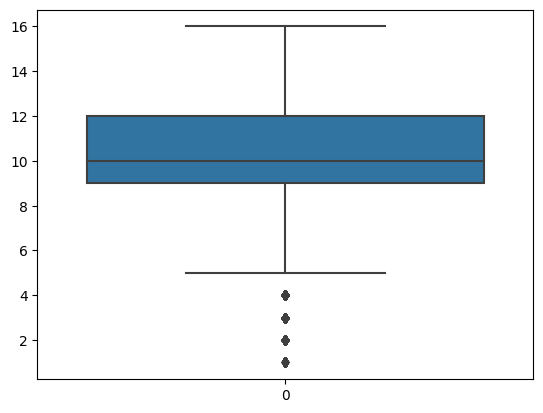

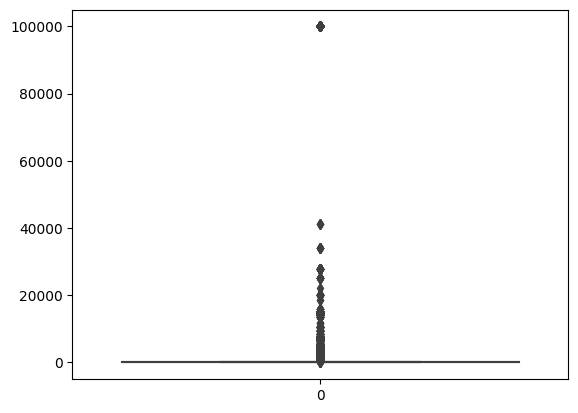

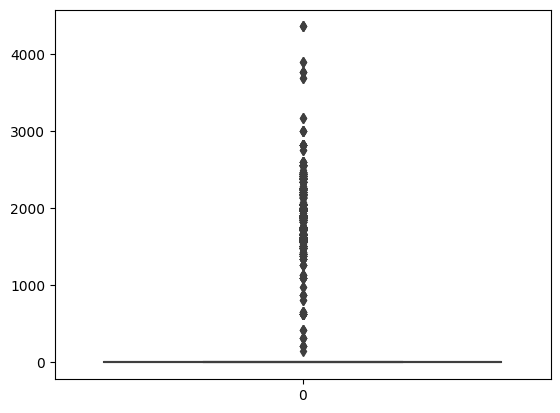

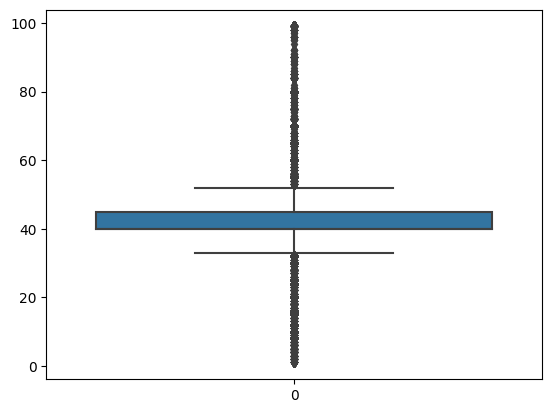

In [63]:
def main():
    df = load_dataset()
    print("Data Quality Checks:")
    data_quality_checks(df)
    print("\nProfiling Visualization:")
    profiling_visualization(df)

main()